In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from warnings import formatwarning

In [2]:
Data=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [3]:
Data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
Data.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
Data.shape

(1525, 10)

In [6]:
Data=Data.drop('Unnamed: 0',axis=1)

In [7]:
Data.shape

(1525, 9)

In [8]:
Data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [9]:
Data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [11]:
Data.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [12]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [15]:
Data = Data.replace([np.inf, -np.inf], np.nan)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

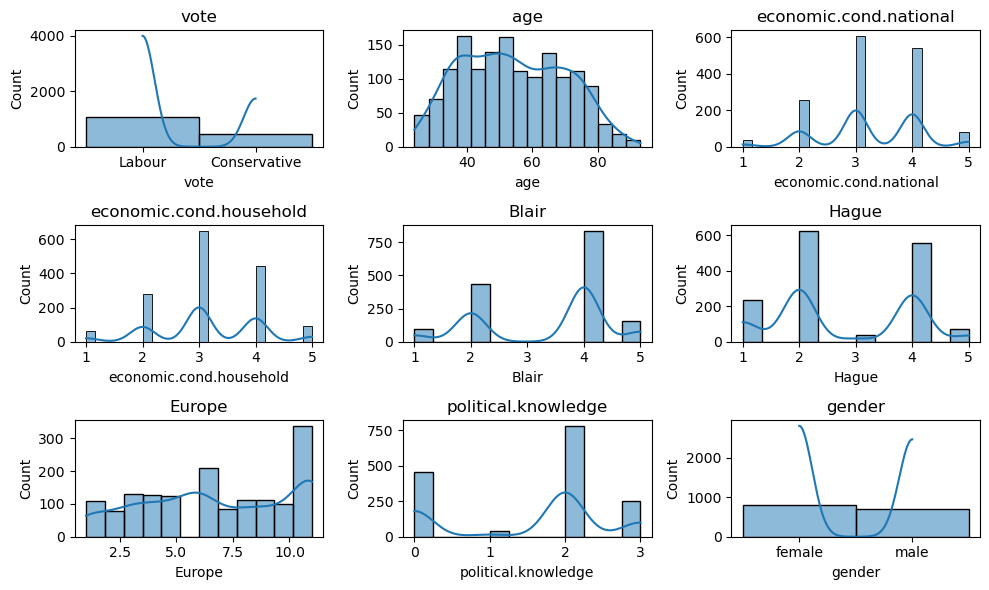

In [19]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(Data.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(Data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

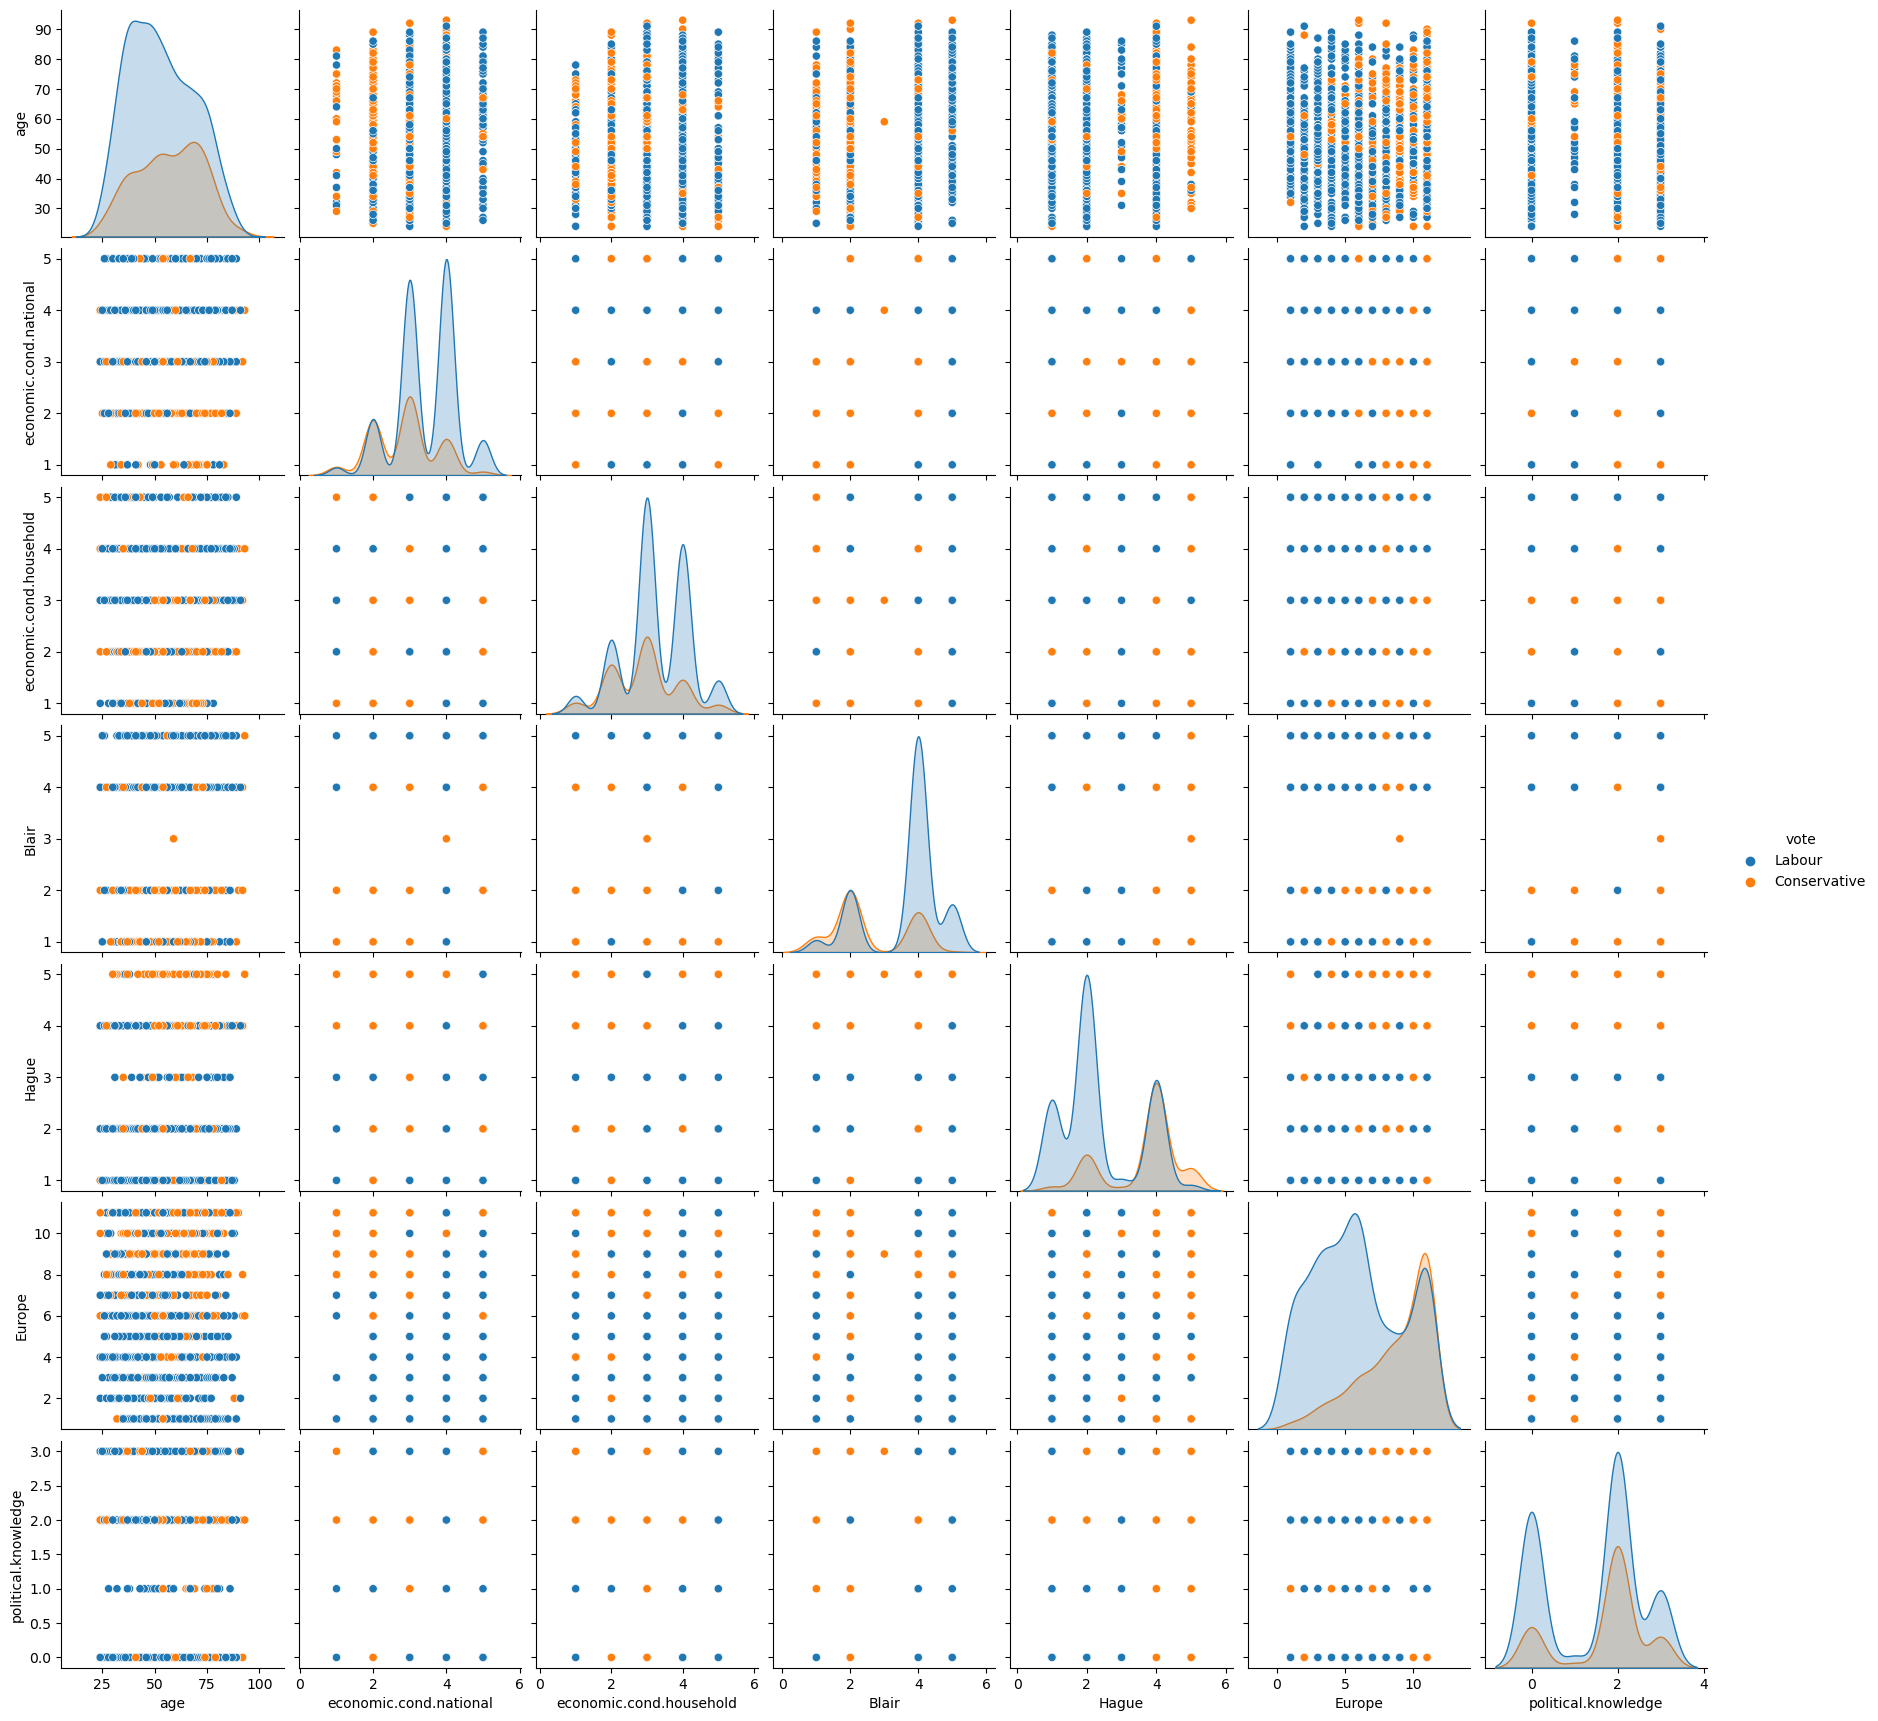

In [22]:
sns.pairplot(Data, hue='vote')
plt.show()

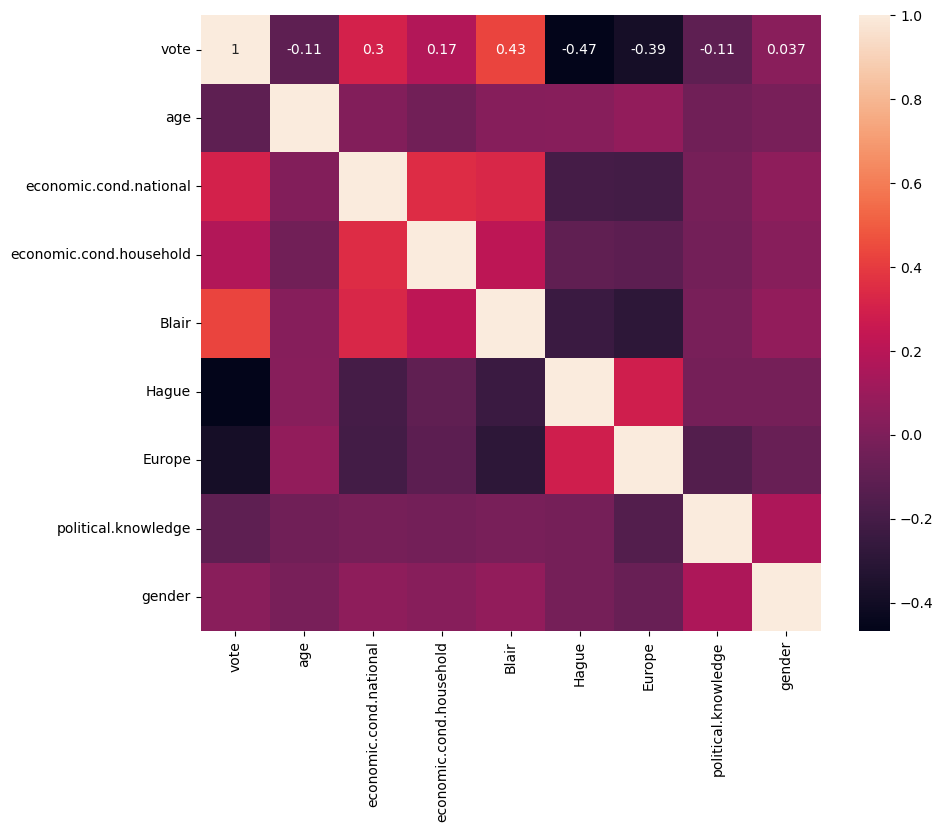

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(Data.corr(),annot=True)
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Data['gender'] = label_encoder.fit_transform(Data['gender'])
label_encoder = LabelEncoder()
Data['vote'] = label_encoder.fit_transform(Data['vote'])

In [68]:
X = Data.drop('vote', axis=1)
y = Data['vote']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [60]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [64]:
knn_model = KNeighborsClassifier()
NB_model = GaussianNB()
bagging_model = BaggingClassifier()
boosting_model = AdaBoostClassifier()


In [65]:
knn_model.fit(X_train_scaled, y_train)
NB_model.fit(X_train_scaled, y_train)
bagging_model.fit(X_train_scaled, y_train)
boosting_model.fit(X_train_scaled, y_train)


AdaBoostClassifier()

In [66]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     

0.3280224929709466
[[117 212]
 [505 233]]
              precision    recall  f1-score   support

           0       0.19      0.36      0.25       329
           1       0.52      0.32      0.39       738

    accuracy                           0.33      1067
   macro avg       0.36      0.34      0.32      1067
weighted avg       0.42      0.33      0.35      1067



/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [72]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    

0.3165938864628821
[[ 50  83]
 [230  95]]
              precision    recall  f1-score   support

           0       0.18      0.38      0.24       133
           1       0.53      0.29      0.38       325

    accuracy                           0.32       458
   macro avg       0.36      0.33      0.31       458
weighted avg       0.43      0.32      0.34       458



/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [73]:
NB_model.score(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


0.3280224929709466

In [74]:
NB_model.score(X_test, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


0.3165938864628821

In [75]:
models = {'KNN': knn_model, 'Naive Bayes': nb_model, 'Bagging': bagging_model, 'Boosting': boosting_model}
for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    print("\nModel:", name)
    print("Training Accuracy:", model.score(X_train_scaled, y_train))
    print("Testing Accuracy:", model.score(X_test_scaled, y_test))
    print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))
    print("\nClassification Report (Test Data):\n", classification_report(y_test, y_pred_test))



Model: KNN
Training Accuracy: 0.8772258669165885
Testing Accuracy: 0.7751091703056768

Confusion Matrix (Test Data):
 [[ 84  49]
 [ 54 271]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.61      0.63      0.62       133
           1       0.85      0.83      0.84       325

    accuracy                           0.78       458
   macro avg       0.73      0.73      0.73       458
weighted avg       0.78      0.78      0.78       458


Model: Naive Bayes
Training Accuracy: 0.8397375820056232
Testing Accuracy: 0.8187772925764192

Confusion Matrix (Test Data):
 [[ 87  46]
 [ 37 288]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.70      0.65      0.68       133
           1       0.86      0.89      0.87       325

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82  

ROC-AUC Score: 0.8746211683053788


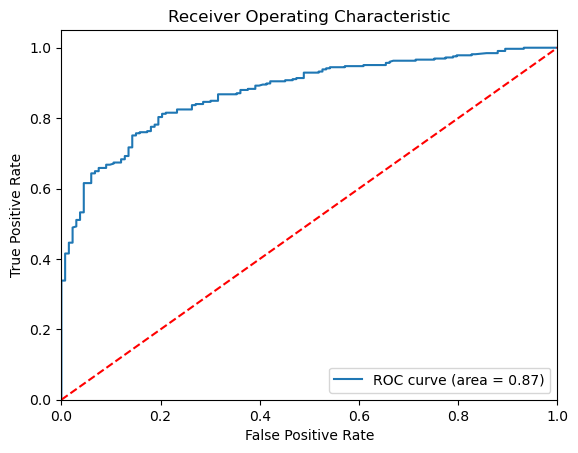

In [76]:
    y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print("ROC-AUC Score:", roc_auc)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [77]:
best_model_name = max(models, key=lambda k: models[k].score(X_test_scaled, y_test))
best_model = models[best_model_name]
print("\nFinal Model Selection:", best_model_name)


Final Model Selection: Naive Bayes


In [78]:
if best_model_name in ["Bagging", "Boosting"]:
    feature_importances = best_model.feature_importances_
    important_features = X.columns[np.argsort(feature_importances)[::-1][:5]]
    print("Most Important Features:", important_features)

In [79]:
print("\nModel Comparison:")
for name, model in models.items():
    print(name, "Accuracy:", model.score(X_test_scaled, y_test))


Model Comparison:
KNN Accuracy: 0.7751091703056768
Naive Bayes Accuracy: 0.8187772925764192
Bagging Accuracy: 0.7969432314410481
Boosting Accuracy: 0.8034934497816594


In [80]:
from sklearn.model_selection import cross_val_score
train_scores = cross_val_score(NB_model, X_train, y_train, cv=5)
train_scores

array([0.80841121, 0.85514019, 0.84507042, 0.83568075, 0.84976526])

In [81]:
test_scores = cross_val_score(NB_model, X_test, y_test, cv=5)
test_scores

array([0.79347826, 0.83695652, 0.7826087 , 0.78021978, 0.83516484])

In [82]:
np.mean(train_scores)

0.8388135667588085

In [83]:
np.mean(test_scores)

0.805685618729097

In [84]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [85]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9990627928772259
0.75764192139738


In [96]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8125585754451734
0.7816593886462883


In [97]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
age                      0.069192
economic.cond.national   0.000000
economic.cond.household  0.000000
Blair                    0.319860
Hague                    0.516214
Europe                   0.094734
political.knowledge      0.000000
gender                   0.000000


0.7816593886462883


<Axes: >

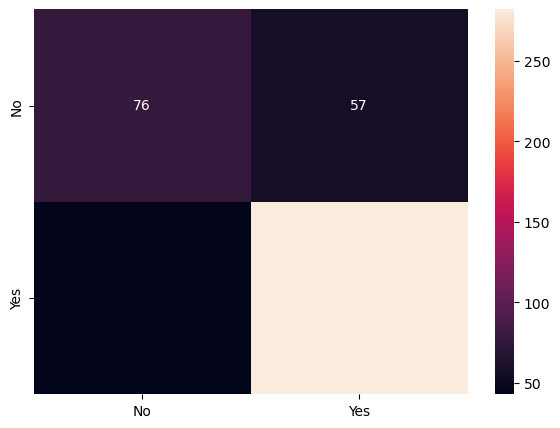

In [98]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [99]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8122270742358079


<Axes: >

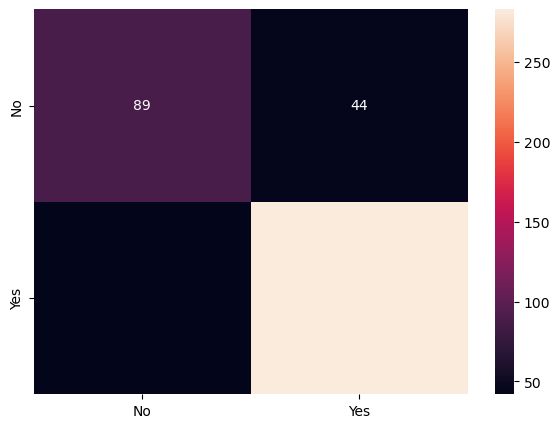

In [100]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [101]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8100436681222707


<Axes: >

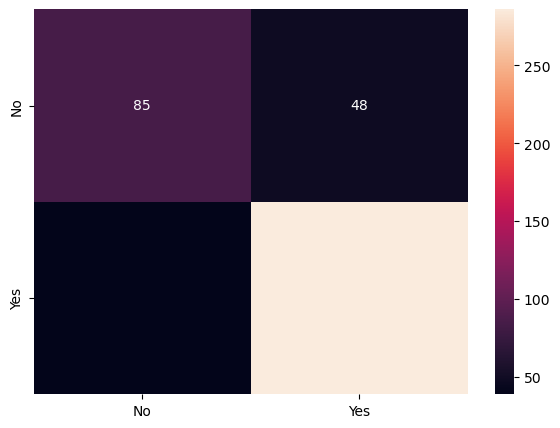

In [102]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.8100436681222707


<Axes: >

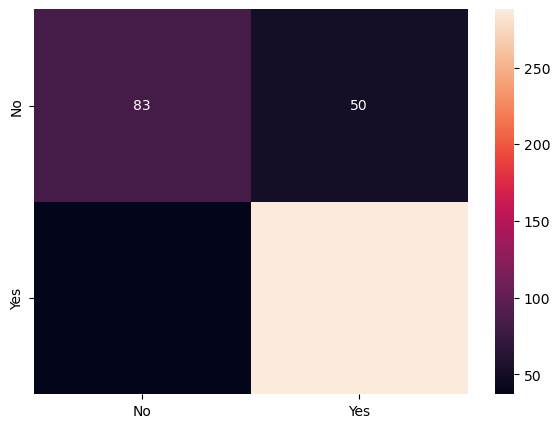

In [104]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.8144104803493449


<Axes: >

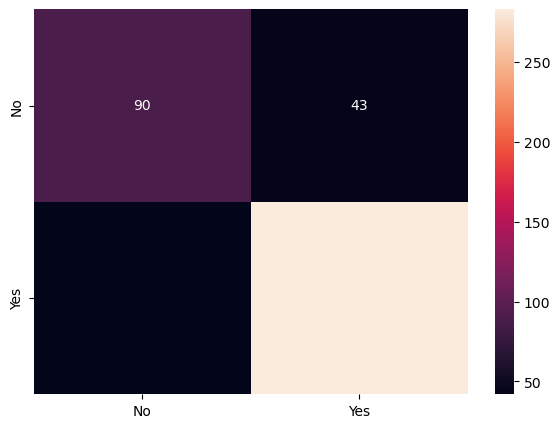

In [106]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')